<a href="https://colab.research.google.com/github/tarunbalajiks/mini-project/blob/main/Siamese_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
from PIL import Image
import PIL.ImageOps

import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
import torchvision.utils
import torch
from torch.autograd import Variable
import torch.nn as nn
from torch import optim
import torch.nn.functional as F


In [ ]:
def imshow(img, text=None):
    npimg = img.numpy()
    plt.axis("off")
    if text:
        plt.text(75, 8, text, style='italic', fontweight='bold',
                 bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 10})
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

def show_plot(iteration, loss):
    plt.plot(iteration, loss)
    plt.show()


In [ ]:
class SiameseNetworkDataset(Dataset):
    def __init__(self, imageFolderDataset, transform=None):
        self.imageFolderDataset = imageFolderDataset
        self.transform = transform

    def __getitem__(self, index):
        img0_tuple = random.choice(self.imageFolderDataset.imgs)

        should_get_same_class = random.randint(0, 1)
        if should_get_same_class:
            while True:
                img1_tuple = random.choice(self.imageFolderDataset.imgs)
                if img0_tuple[1] == img1_tuple[1]:
                    break
        else:
            while True:
                img1_tuple = random.choice(self.imageFolderDataset.imgs)
                if img0_tuple[1] != img1_tuple[1]:
                    break

        img0 = Image.open(img0_tuple[0])
        img1 = Image.open(img1_tuple[0])

        img0 = img0.convert("L")
        img1 = img1.convert("L")

        if self.transform is not None:
            img0 = self.transform(img0)
            img1 = self.transform(img1)

        return img0, img1, torch.from_numpy(np.array([int(img1_tuple[1] != img0_tuple[1])], dtype=np.float32))

    def __len__(self):
        return len(self.imageFolderDataset.imgs)


In [48]:
# Unzipping the Data
!unzip Data.zip

Archive:  Data.zip
   creating: Data/Faces/
   creating: Data/Faces/testing/
   creating: Data/Faces/testing/Mouna/
  inflating: Data/Faces/testing/Mouna/Mouna0.jpg  
  inflating: Data/Faces/testing/Mouna/Mouna1.jpg  
  inflating: Data/Faces/testing/Mouna/Mouna2.jpg  
  inflating: Data/Faces/testing/Mouna/Mouna3.jpg  
  inflating: Data/Faces/testing/Mouna/Mouna4.jpg  
  inflating: Data/Faces/testing/Mouna/Mouna5.jpg  
  inflating: Data/Faces/testing/Mouna/Mouna6.jpg  
  inflating: Data/Faces/testing/Mouna/Mouna7.jpg  
   creating: Data/Faces/training/
   creating: Data/Faces/training/Bindu/
  inflating: Data/Faces/training/Bindu/Bindu0.jpg  
  inflating: Data/Faces/training/Bindu/Bindu1.jpg  
  inflating: Data/Faces/training/Bindu/Bindu2.jpg  
  inflating: Data/Faces/training/Bindu/Bindu3.jpg  
  inflating: Data/Faces/training/Bindu/Bindu4.jpg  
  inflating: Data/Faces/training/Bindu/Bindu5.jpg  
 extracting: Data/Faces/training/Bindu/Bindu6.jpg  
 extracting: Data/Faces/training/Bindu

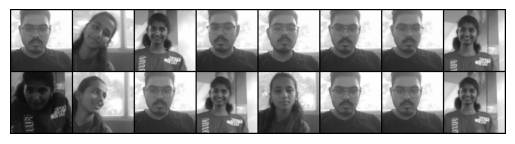

[1. 0. 1. 1. 1. 0. 0. 0.]


In [ ]:
folder_dataset = datasets.ImageFolder(root="/content/Data/Faces/training")

transformation = transforms.Compose([transforms.Resize((100, 100)),
                                     transforms.ToTensor()
                                    ])

siamese_dataset = SiameseNetworkDataset(imageFolderDataset=folder_dataset,
                                        transform=transformation)

vis_dataloader = DataLoader(siamese_dataset,
                            shuffle=True,
                            num_workers=2,
                            batch_size=8)

example_batch = next(iter(vis_dataloader))
concatenated = torch.cat((example_batch[0], example_batch[1]), 0)

imshow(torchvision.utils.make_grid(concatenated))
print(example_batch[2].numpy().reshape(-1))

# 0 = Same Person
# 1 = Different Person

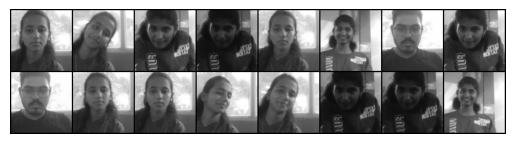

[1. 0. 1. 1. 0. 0. 1. 0.]
Epoch number 0
 Current loss 2.8717992305755615

Epoch number 1
 Current loss 1.558966040611267

Epoch number 2
 Current loss 1.9603983163833618

Epoch number 3
 Current loss 1.626617670059204

Epoch number 4
 Current loss 1.4199721813201904

Epoch number 5
 Current loss 0.9966039657592773

Epoch number 6
 Current loss 0.5599184036254883

Epoch number 7
 Current loss 1.6226717233657837

Epoch number 8
 Current loss 0.9723113179206848

Epoch number 9
 Current loss 0.41816607117652893

Epoch number 10
 Current loss 1.0512340068817139

Epoch number 11
 Current loss 0.40928858518600464

Epoch number 12
 Current loss 0.9049386382102966

Epoch number 13
 Current loss 0.5737841129302979

Epoch number 14
 Current loss 0.7697669267654419

Epoch number 15
 Current loss 0.8185698986053467

Epoch number 16
 Current loss 0.8644202351570129

Epoch number 17
 Current loss 0.49253469705581665

Epoch number 18
 Current loss 0.8139298558235168

Epoch number 19
 Current loss 0.3

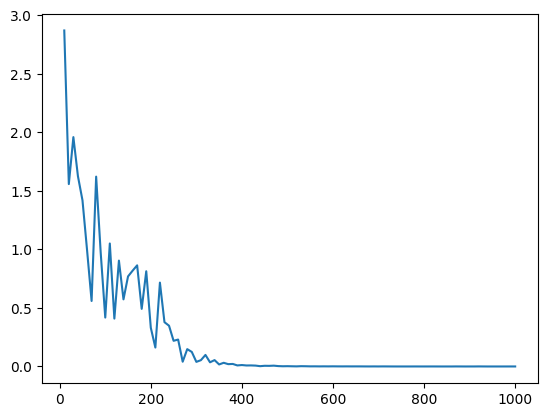

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
from PIL import Image
import PIL.ImageOps

import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
import torchvision.utils
import torch
from torch.autograd import Variable
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

# Creating some helper functions
def imshow(img, text=None):
    npimg = img.numpy()
    plt.axis("off")
    if text:
        plt.text(75, 8, text, style='italic', fontweight='bold',
                 bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 10})

    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

def show_plot(iteration, loss):
    plt.plot(iteration, loss)
    plt.show()

class SiameseNetworkDataset(Dataset):
    def __init__(self, imageFolderDataset, transform=None):
        self.imageFolderDataset = imageFolderDataset
        self.transform = transform

    def __getitem__(self, index):
        img0_tuple = random.choice(self.imageFolderDataset.imgs)

        # We need to approximately 50% of images to be in the same class
        should_get_same_class = random.randint(0, 1)
        if should_get_same_class:
            while True:
                # Look until the same class image is found
                img1_tuple = random.choice(self.imageFolderDataset.imgs)
                if img0_tuple[1] == img1_tuple[1]:
                    break
        else:
            while True:
                # Look until a different class image is found
                img1_tuple = random.choice(self.imageFolderDataset.imgs)
                if img0_tuple[1] != img1_tuple[1]:
                    break

        img0 = Image.open(img0_tuple[0])
        img1 = Image.open(img1_tuple[0])

        img0 = img0.convert("L")
        img1 = img1.convert("L")

        if self.transform is not None:
            img0 = self.transform(img0)
            img1 = self.transform(img1)

        return img0, img1, torch.from_numpy(np.array([int(img1_tuple[1] != img0_tuple[1])], dtype=np.float32))

    def __len__(self):
        return len(self.imageFolderDataset.imgs)

folder_dataset = datasets.ImageFolder(root="./Data/Faces/training/")
transformation = transforms.Compose([transforms.Resize((100, 100)),
                                     transforms.ToTensor()])

siamese_dataset = SiameseNetworkDataset(imageFolderDataset=folder_dataset,
                                        transform=transformation)

vis_dataloader = DataLoader(siamese_dataset,
                            shuffle=True,
                            num_workers=2,
                            batch_size=8)

example_batch = next(iter(vis_dataloader))
concatenated = torch.cat((example_batch[0], example_batch[1]), 0)
imshow(torchvision.utils.make_grid(concatenated))
print(example_batch[2].numpy().reshape(-1))

class SiameseNetwork(nn.Module):
    def __init__(self):
        super(SiameseNetwork, self).__init__()

        self.cnn1 = nn.Sequential(
            nn.Conv2d(1, 96, kernel_size=11, stride=4),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(3, stride=2),

            nn.Conv2d(96, 256, kernel_size=5, stride=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, stride=2),

            nn.Conv2d(256, 384, kernel_size=3, stride=1),
            nn.ReLU(inplace=True)
        )

        self._to_linear = None
        self.convs(torch.randn(1, 1, 100, 100))

        self.fc1 = nn.Sequential(
            nn.Linear(self._to_linear, 1024),
            nn.ReLU(inplace=True),

            nn.Linear(1024, 256),
            nn.ReLU(inplace=True),

            nn.Linear(256, 2)
        )

    def convs(self, x):
        x = self.cnn1(x)
        if self._to_linear is None:
            self._to_linear = x.view(x.size(0), -1).shape[1]
        return x

    def forward_once(self, x):
        output = self.convs(x)
        output = output.view(output.size()[0], -1)
        output = self.fc1(output)
        return output

    def forward(self, input1, input2):
        output1 = self.forward_once(input1)
        output2 = self.forward_once(input2)
        return output1, output2

class ContrastiveLoss(torch.nn.Module):
    def __init__(self, margin=2.0):
        super(ContrastiveLoss, self).__init__()
        self.margin = margin

    def forward(self, output1, output2, label):
        euclidean_distance = F.pairwise_distance(output1, output2, keepdim=True)
        loss_contrastive = torch.mean((1 - label) * torch.pow(euclidean_distance, 2) +
                                      (label) * torch.pow(torch.clamp(self.margin - euclidean_distance, min=0.0), 2))
        return loss_contrastive

train_dataloader = DataLoader(siamese_dataset,
                              shuffle=True,
                              num_workers=2,
                              batch_size=64)

net = SiameseNetwork().cuda()
criterion = ContrastiveLoss()
optimizer = optim.Adam(net.parameters(), lr=0.0005)

counter = []
loss_history = []
iteration_number = 0

for epoch in range(100):
    for i, (img0, img1, label) in enumerate(train_dataloader, 0):
        img0, img1, label = img0.cuda(), img1.cuda(), label.cuda()

        optimizer.zero_grad()
        output1, output2 = net(img0, img1)
        loss_contrastive = criterion(output1, output2, label)
        loss_contrastive.backward()
        optimizer.step()

        if i % 10 == 0:
            print(f"Epoch number {epoch}\n Current loss {loss_contrastive.item()}\n")
            iteration_number += 10
            counter.append(iteration_number)
            loss_history.append(loss_contrastive.item())

# Save the trained model
torch.save(net.state_dict(), 'siamese_model.pth')

show_plot(counter, loss_history)


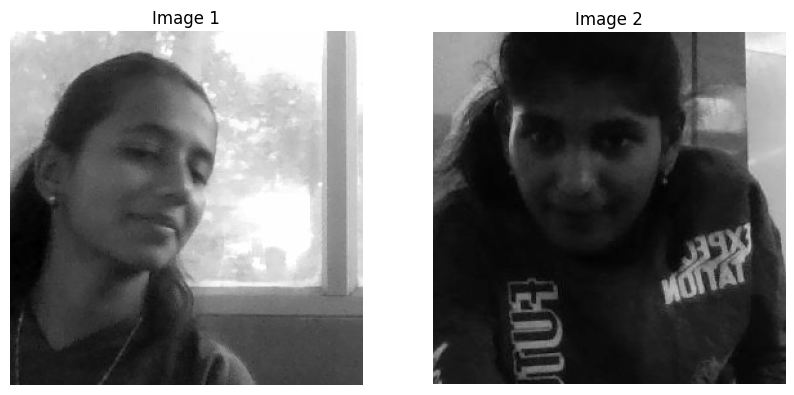

Dissimilarity: 2.16
Person in Photos are Different


In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

# Define the transformation
transformation = transforms.Compose([transforms.Resize((100, 100)),
                                     transforms.ToTensor()])

# Load the pretrained model
net = SiameseNetwork().cuda()
net.load_state_dict(torch.load('siamese_model.pth'))
net.eval()

# Function to display images side by side
def show_images_side_by_side(img1, img2):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(img1, cmap='gray')
    axs[0].axis('off')
    axs[0].set_title('Image 1')

    axs[1].imshow(img2, cmap='gray')
    axs[1].axis('off')
    axs[1].set_title('Image 2')

    plt.show()

# Function to compare two images
def compare_images(img_path1, img_path2):
    img1 = Image.open(img_path1).convert("L")
    img2 = Image.open(img_path2).convert("L")
    img1_tensor = transformation(img1).unsqueeze(0).cuda()
    img2_tensor = transformation(img2).unsqueeze(0).cuda()

    output1, output2 = net(img1_tensor, img2_tensor)
    euclidean_distance = F.pairwise_distance(output1, output2).item()

    show_images_side_by_side(img1, img2)
    print(f'Dissimilarity: {euclidean_distance:.2f}')

    if euclidean_distance <= 1:
        print("Person in Both Photos is the same")
    else:
        print("Person in Photos are Different")

# Example usage to compare two images
compare_images("/content/Data/Faces/testing/Mouna/Mouna1.jpg", "/content/Data/Faces/training/Bindu/Bindu0.jpg")


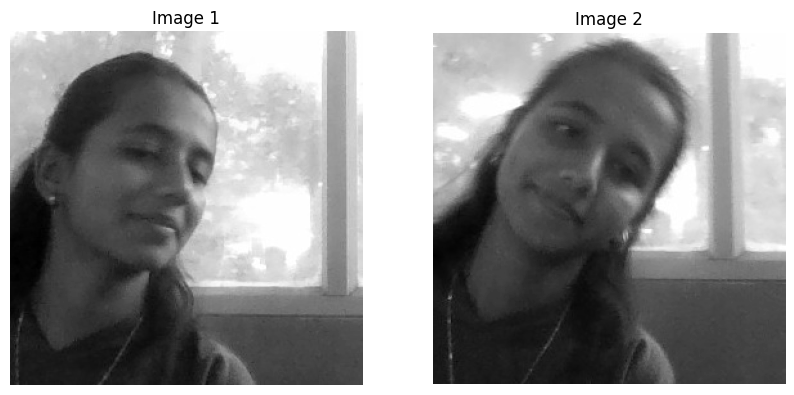

Dissimilarity: 0.01
Person in Both Photos: Unknown


In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import os

# Define the transformation
transformation = transforms.Compose([transforms.Resize((100, 100)),
                                     transforms.ToTensor()])

# Load the pretrained model
net = SiameseNetwork().cuda()
net.load_state_dict(torch.load('siamese_model.pth'))
net.eval()

# Create a dictionary to map image paths to person names
def create_image_to_name_mapping(root_dir):
    image_to_name = {}
    for person_name in os.listdir(root_dir):
        person_dir = os.path.join(root_dir, person_name)
        if os.path.isdir(person_dir):
            for img_name in os.listdir(person_dir):
                img_path = os.path.join(person_dir, img_name)
                image_to_name[img_path] = person_name
    return image_to_name

# Assume the root directory is "./Data/Faces/testing/"
image_to_name_mapping = create_image_to_name_mapping("./Data/Faces/testing/")

# Function to display images side by side
def show_images_side_by_side(img1, img2):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(img1, cmap='gray')
    axs[0].axis('off')
    axs[0].set_title('Image 1')

    axs[1].imshow(img2, cmap='gray')
    axs[1].axis('off')
    axs[1].set_title('Image 2')

    plt.show()

# Function to compare two images
def compare_images(img_path1, img_path2):
    img1 = Image.open(img_path1).convert("L")
    img2 = Image.open(img_path2).convert("L")
    img1_tensor = transformation(img1).unsqueeze(0).cuda()
    img2_tensor = transformation(img2).unsqueeze(0).cuda()

    output1, output2 = net(img1_tensor, img2_tensor)
    euclidean_distance = F.pairwise_distance(output1, output2).item()

    show_images_side_by_side(img1, img2)
    print(f'Dissimilarity: {euclidean_distance:.2f}')

    if euclidean_distance <= 1:
        name1 = image_to_name_mapping.get(img_path1, "Unknown")
        name2 = image_to_name_mapping.get(img_path2, "Unknown")

        if name1 == name2:
            print(f"Person in Both Photos: {name1}")
        else:
            print("Person in Photos are Different")
    else:
        print("Person in Photos are Different")

# Example usage to compare two images
compare_images("/content/Data/Faces/testing/Mouna/Mouna1.jpg", "/content/Data/Faces/testing/Mouna/Mouna3.jpg")


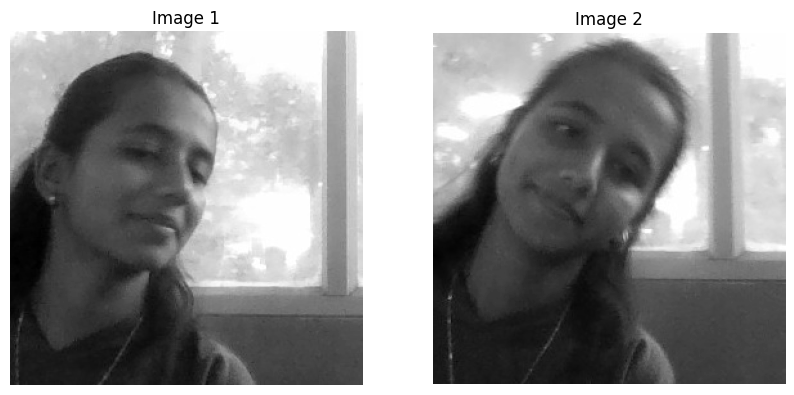

Dissimilarity: 0.01
Person in Photos are Different


In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import os

# Define the transformation
transformation = transforms.Compose([transforms.Resize((100, 100)),
                                     transforms.ToTensor()])

# Load the pretrained model
net = SiameseNetwork().cuda()
net.load_state_dict(torch.load('siamese_model.pth'))
net.eval()

# Create a dictionary to map image paths to person names
def create_image_to_name_mapping(root_dir):
    image_to_name = {}
    for person_name in os.listdir(root_dir):
        person_dir = os.path.join(root_dir, person_name)
        if os.path.isdir(person_dir):
            for img_name in os.listdir(person_dir):
                img_path = os.path.join(person_dir, img_name)
                image_to_name[img_path] = person_name
    return image_to_name

# Assume the root directory is "./Data/Faces/testing/"
image_to_name_mapping = create_image_to_name_mapping("./Data/Faces/testing/")

# Function to display images side by side
def show_images_side_by_side(img1, img2):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(img1, cmap='gray')
    axs[0].axis('off')
    axs[0].set_title('Image 1')

    axs[1].imshow(img2, cmap='gray')
    axs[1].axis('off')
    axs[1].set_title('Image 2')

    plt.show()

# Function to compare two images
def compare_images(img_path1, img_path2):
    img1 = Image.open(img_path1).convert("L")
    img2 = Image.open(img_path2).convert("L")
    img1_tensor = transformation(img1).unsqueeze(0).cuda()
    img2_tensor = transformation(img2).unsqueeze(0).cuda()

    output1, output2 = net(img1_tensor, img2_tensor)
    euclidean_distance = F.pairwise_distance(output1, output2).item()

    show_images_side_by_side(img1, img2)
    print(f'Dissimilarity: {euclidean_distance:.2f}')

    if euclidean_distance <= 1:
        name1 = image_to_name_mapping.get(img_path1, None)
        name2 = image_to_name_mapping.get(img_path2, None)

        if name1 and name2 and name1 == name2:
            print(f"Person in Both Photos: {name1}")
        else:
            print("Person in Photos are Different")
    else:
        print("Person in Photos are Different")

# Example usage to compare two images
compare_images("/content/Data/Faces/testing/Mouna/Mouna1.jpg", "/content/Data/Faces/testing/Mouna/Mouna3.jpg")


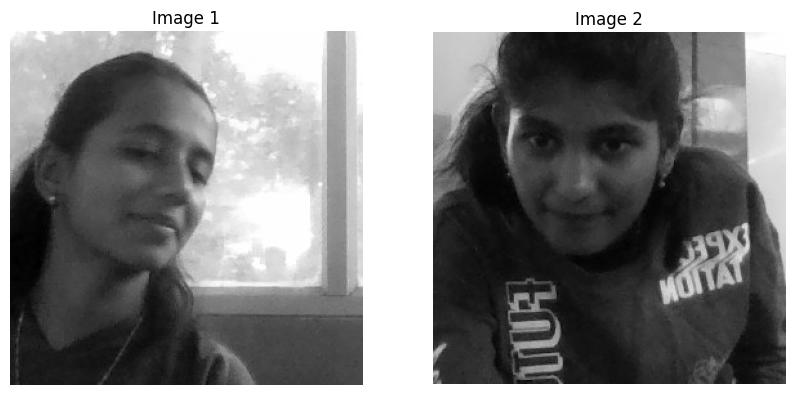

Dissimilarity: 2.12
Person in Photos are Different


In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import os

# Define the transformation
transformation = transforms.Compose([transforms.Resize((100, 100)),
                                     transforms.ToTensor()])

# Load the pretrained model
net = SiameseNetwork().cuda()
net.load_state_dict(torch.load('siamese_model.pth'))
net.eval()

# Create a dictionary to map image paths to person names
def create_image_to_name_mapping(root_dir):
    image_to_name = {}
    for person_name in os.listdir(root_dir):
        person_dir = os.path.join(root_dir, person_name)
        if os.path.isdir(person_dir):
            for img_name in os.listdir(person_dir):
                img_path = os.path.join(person_dir, img_name)
                image_to_name[img_path] = person_name
    return image_to_name

# Assume the root directory is "./Data/Faces/testing/"
image_to_name_mapping = create_image_to_name_mapping("./Data/Faces/testing/")

# Function to display images side by side
def show_images_side_by_side(img1, img2):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(img1, cmap='gray')
    axs[0].axis('off')
    axs[0].set_title('Image 1')

    axs[1].imshow(img2, cmap='gray')
    axs[1].axis('off')
    axs[1].set_title('Image 2')

    plt.show()

# Function to compare two images
def compare_images(img_path1, img_path2, threshold=1.0):
    img1 = Image.open(img_path1).convert("L")
    img2 = Image.open(img_path2).convert("L")
    img1_tensor = transformation(img1).unsqueeze(0).cuda()
    img2_tensor = transformation(img2).unsqueeze(0).cuda()

    output1, output2 = net(img1_tensor, img2_tensor)
    euclidean_distance = F.pairwise_distance(output1, output2).item()

    show_images_side_by_side(img1, img2)
    print(f'Dissimilarity: {euclidean_distance:.2f}')

    if euclidean_distance <= threshold:
        name1 = image_to_name_mapping.get(img_path1, "Unknown")
        name2 = image_to_name_mapping.get(img_path2, "Unknown")

        if name1 and name2 and name1 == name2:
            print(f"Person in Both Photos: {name1}")
        else:
            print("Person in Photos are Different")
    else:
        print("Person in Photos are Different")

# Example usage to compare two images with a threshold of 0.5
compare_images("/content/Data/Faces/testing/Mouna/Mouna1.jpg", "/content/Data/Faces/training/Bindu/Bindu2.jpg")


In [ ]:
!mv /content/Data /content/drive/MyDrive/Data

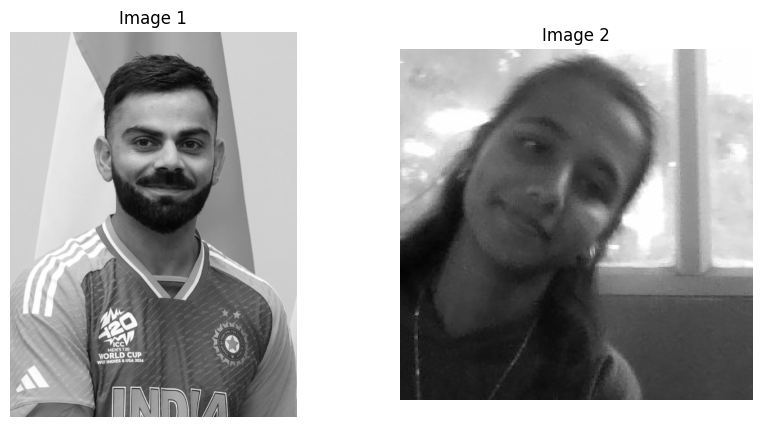

Dissimilarity: 0.17
Person in Both Photos: Mouna


In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import torch
import torchvision.transforms as transforms
import torch.nn.functional as F

# Define the transformation
transformation = transforms.Compose([transforms.Resize((100, 100)),
                                     transforms.ToTensor()])

# Load the pretrained model
net = SiameseNetwork().cuda()
net.load_state_dict(torch.load('siamese_model.pth'))
net.eval()

# Function to display images side by side
def show_images_side_by_side(img1, img2):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(img1, cmap='gray')
    axs[0].axis('off')
    axs[0].set_title('Image 1')

    axs[1].imshow(img2, cmap='gray')
    axs[1].axis('off')
    axs[1].set_title('Image 2')

    plt.show()

# Function to find the directory in the dataset
def find_matching_directory(img_path1, img_path2, root_dir, threshold=1.0):
    img1 = Image.open(img_path1).convert("L")
    img2 = Image.open(img_path2).convert("L")
    img1_tensor = transformation(img1).unsqueeze(0).cuda()
    img2_tensor = transformation(img2).unsqueeze(0).cuda()

    output1, output2 = net(img1_tensor, img2_tensor)
    euclidean_distance = F.pairwise_distance(output1, output2).item()

    show_images_side_by_side(img1, img2)
    print(f'Dissimilarity: {euclidean_distance:.2f}')

    if euclidean_distance <= threshold:
        # Scan the dataset to find matching directory
        for person_name in os.listdir(root_dir):
            person_dir = os.path.join(root_dir, person_name)
            if os.path.isdir(person_dir):
                for img_name in os.listdir(person_dir):
                    img_path = os.path.join(person_dir, img_name)
                    img_tensor = transformation(Image.open(img_path).convert("L")).unsqueeze(0).cuda()
                    output = net.forward_once(img_tensor)
                    dist = F.pairwise_distance(output, output1).item()

                    if dist <= threshold:
                        print(f"Person in Both Photos: {person_name}")
                        return

        print("Person is same in picture, but not stored in our system")
    else:
        print("Person in Photos are Different")

# Example usage
find_matching_directory("/content/virat.jpg", "/content/Data/Faces/testing/Mouna/Mouna3.jpg", "./Data/Faces/testing/", threshold=1.0)


Person in the image is: Mouna


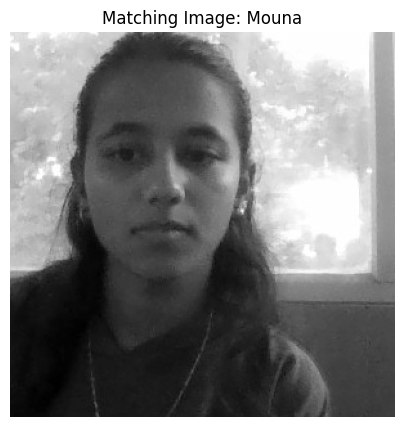

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import torch
import torchvision.transforms as transforms
import torch.nn.functional as F

# Define the transformation
transformation = transforms.Compose([transforms.Resize((100, 100)),
                                     transforms.ToTensor()])

# Load the pretrained model
net = SiameseNetwork().cuda()
net.load_state_dict(torch.load('siamese_model.pth'))
net.eval()

# Function to display an image
def show_image(img, title=None):
    plt.figure(figsize=(5, 5))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    if title:
        plt.title(title)
    plt.show()

# Function to find the person in the dataset
def find_person_in_dataset(img_path, root_dir, threshold=1.0):
    img = Image.open(img_path).convert("L")
    img_tensor = transformation(img).unsqueeze(0).cuda()

    output_img = net.forward_once(img_tensor)

    # Iterate over the dataset to find a match
    for person_name in os.listdir(root_dir):
        person_dir = os.path.join(root_dir, person_name)
        if os.path.isdir(person_dir):
            for img_name in os.listdir(person_dir):
                img_path_in_dataset = os.path.join(person_dir, img_name)
                img_dataset = Image.open(img_path_in_dataset).convert("L")
                img_dataset_tensor = transformation(img_dataset).unsqueeze(0).cuda()
                output_dataset_img = net.forward_once(img_dataset_tensor)

                # Calculate distance
                dist = F.pairwise_distance(output_img, output_dataset_img).item()

                if dist <= threshold:
                    print(f"Person in the image is: {person_name}")
                    show_image(img_dataset, title=f"Matching Image: {person_name}")
                    return

    # Not found case
    print("Person isn't available in our system")
    show_image(img, title="Matching Image: Not Found")

# Example usage
find_person_in_dataset("/content/virat.jpg", "./Data/Faces/testing/", threshold=1.0)


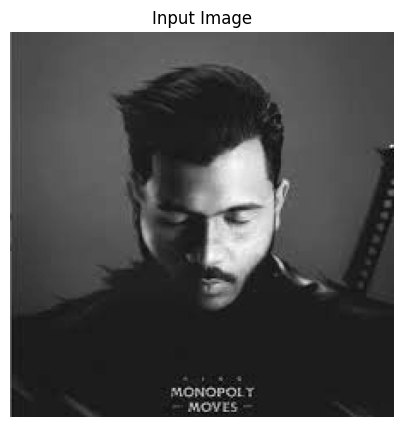

Person isn't available in our system


In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import torch
import torchvision.transforms as transforms
import torch.nn.functional as F

# Define the transformation
transformation = transforms.Compose([transforms.Resize((100, 100)),
                                     transforms.ToTensor()])

# Load the pretrained model
net = SiameseNetwork().cuda()
net.load_state_dict(torch.load('siamese_model.pth'))
net.eval()

# Function to display an image
def show_image(img, title=None):
    plt.figure(figsize=(5, 5))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    if title:
        plt.title(title)
    plt.show()

# Function to find the person in the dataset
def find_person_in_dataset(img_path, root_dir, threshold=1.0):
    img = Image.open(img_path).convert("L")
    img_tensor = transformation(img).unsqueeze(0).cuda()

    output_img = net.forward_once(img_tensor)
    match_found = False
    matched_person_name = None
    matched_img = None

    # Iterate over the dataset to find a match
    for person_name in os.listdir(root_dir):
        person_dir = os.path.join(root_dir, person_name)
        if os.path.isdir(person_dir):
            for img_name in os.listdir(person_dir):
                img_path_in_dataset = os.path.join(person_dir, img_name)
                img_dataset = Image.open(img_path_in_dataset).convert("L")
                img_dataset_tensor = transformation(img_dataset).unsqueeze(0).cuda()
                output_dataset_img = net.forward_once(img_dataset_tensor)

                # Calculate distance
                dist = F.pairwise_distance(output_img, output_dataset_img).item()

                if dist <= threshold:
                    match_found = True
                    matched_person_name = person_name
                    matched_img = img_dataset
                    break
            if match_found:
                break

    show_image(img, title="Input Image")
    if match_found:
        print(f"Person in the image is: {matched_person_name}")
        show_image(matched_img, title=f"Matching Image: {matched_person_name}")
    else:
        print("Person isn't available in our system")

# Example usage
find_person_in_dataset("/content/king.jpeg", "./Data/Faces/testing/", threshold=0.5)


Difference: 1.4553922414779663
Difference: 1.4551843404769897
Difference: 1.446433424949646
Difference: 1.4529188871383667
Difference: 1.45261549949646
Difference: 1.453869104385376
Difference: 1.4472230672836304
Difference: 1.4552288055419922
Difference: 1.4553922414779663
Difference: 1.4551843404769897
Difference: 1.446433424949646
Difference: 1.4529188871383667
Difference: 1.45261549949646
Difference: 1.453869104385376
Difference: 1.4472230672836304
Difference: 1.4552288055419922
Difference: 0.6930044293403625
Difference: 0.7076612710952759
Difference: 0.7039658427238464
Difference: 0.6845823526382446
Difference: 0.7117306590080261
Difference: 0.682168185710907
Difference: 0.6821890473365784
Difference: 0.7187625765800476
Difference: 3.6909453868865967
Difference: 3.6786394119262695
Difference: 3.676492929458618
Difference: 3.6941349506378174
Difference: 3.68869686126709
Difference: 3.67899751663208
Difference: 3.696678400039673
Difference: 3.6847727298736572
Difference: 3.684143066

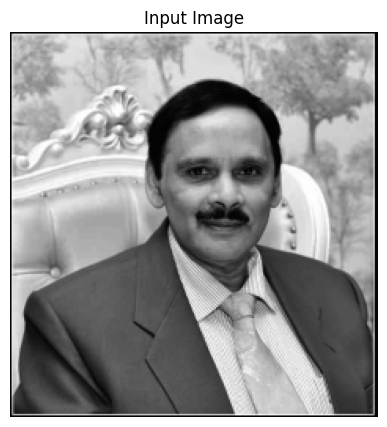

Person isn't available in our system


In [50]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import torch
import torchvision.transforms as transforms
import torch.nn.functional as F

# Define the transformation
transformation = transforms.Compose([transforms.Resize((100, 100)),
                                     transforms.ToTensor()])

# Load the pretrained model
net = SiameseNetwork().cuda()
net.load_state_dict(torch.load('siamese_model.pth'))
net.eval()

# Function to display an image
def show_image(img, title=None):
    plt.figure(figsize=(5, 5))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    if title:
        plt.title(title)
    plt.show()

# Function to recursively find all subdirectories that contain image files
def find_all_image_directories(root_dir):
    image_directories = []
    for dirpath, dirnames, filenames in os.walk(root_dir):
        if any(fname.lower().endswith(('.png', '.jpg', '.jpeg')) for fname in filenames):
            image_directories.append(dirpath)
    return image_directories

# Function to find the person in the dataset
def find_person_in_dataset(img_path, root_dir, threshold=1.0):
    img = Image.open(img_path).convert("L")
    img_tensor = transformation(img).unsqueeze(0).cuda()

    output_img = net.forward_once(img_tensor)
    match_found = False
    matched_person_name = None
    matched_img = None

    # Get all subdirectories containing images
    image_directories = find_all_image_directories(root_dir)

    # Iterate over the image directories to find a match
    for image_directory in image_directories:
        person_name = os.path.basename(image_directory)
        for img_name in os.listdir(image_directory):
            img_path_in_dataset = os.path.join(image_directory, img_name)
            if not img_path_in_dataset.lower().endswith(('.png', '.jpg', '.jpeg')):
                continue
            img_dataset = Image.open(img_path_in_dataset).convert("L")
            img_dataset_tensor = transformation(img_dataset).unsqueeze(0).cuda()
            output_dataset_img = net.forward_once(img_dataset_tensor)

            # Calculate distance
            dist = F.pairwise_distance(output_img, output_dataset_img).item()
            print(f"Difference: {dist}")
            if dist <= threshold:
                match_found = True
                matched_person_name = person_name
                matched_img = img_dataset
                break
        if match_found:
            break

    show_image(img, title="Input Image")
    if match_found:
        print(f"Person in the image is: {matched_person_name}")
        show_image(matched_img, title=f"Matching Image: {matched_person_name}")
    else:
        print("Person isn't available in our system")

# Example usage
find_person_in_dataset("/content/chairman.png", "./Data/Faces/", threshold=0.5)


<IPython.core.display.Javascript object>

Saved photo to photo.jpg


<IPython.core.display.Javascript object>

Checking directory: ./Data/Faces/testing/Mouna, Image: Mouna7.jpg, Diff: 0.22050422430038452


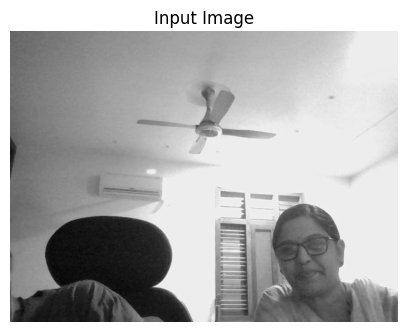

Person in the image is: Mouna


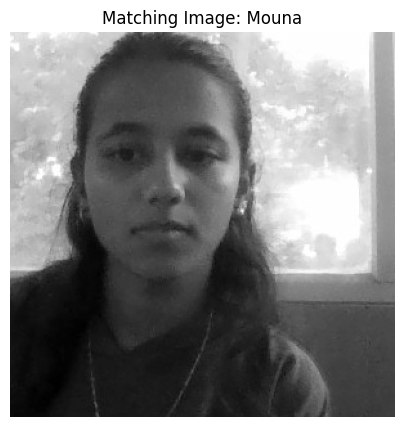

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import torch
import torchvision.transforms as transforms
import torch.nn.functional as F
import cv2
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

# Define the transformation
transformation = transforms.Compose([transforms.Resize((100, 100)),
                                     transforms.ToTensor()])

# Load the pretrained model
class SiameseNetwork(nn.Module):
    def __init__(self):
        super(SiameseNetwork, self).__init__()

        self.cnn1 = nn.Sequential(
            nn.Conv2d(1, 96, kernel_size=11, stride=4),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(3, stride=2),

            nn.Conv2d(96, 256, kernel_size=5, stride=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, stride=2),

            nn.Conv2d(256, 384, kernel_size=3, stride=1),
            nn.ReLU(inplace=True)
        )

        self._to_linear = None
        self.convs(torch.randn(1, 1, 100, 100))

        self.fc1 = nn.Sequential(
            nn.Linear(self._to_linear, 1024),
            nn.ReLU(inplace=True),

            nn.Linear(1024, 256),
            nn.ReLU(inplace=True),

            nn.Linear(256, 2)
        )

    def convs(self, x):
        x = self.cnn1(x)
        if self._to_linear is None:
            self._to_linear = x.view(x.size(0), -1).shape[1]
        return x

    def forward_once(self, x):
        output = self.convs(x)
        output = output.view(output.size()[0], -1)
        output = self.fc1(output)
        return output

    def forward(self, input1, input2):
        output1 = self.forward_once(input1)
        output2 = self.forward_once(input2)
        return output1, output2

net = SiameseNetwork().cuda()
net.load_state_dict(torch.load('siamese_model.pth'))
net.eval()

# Function to display an image
def show_image(img, title=None):
    plt.figure(figsize=(5, 5))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    if title:
        plt.title(title)
    plt.show()

# Function to recursively find all subdirectories that contain image files
def find_all_image_directories(root_dir):
    image_directories = []
    for dirpath, dirnames, filenames in os.walk(root_dir):
        if any(fname.lower().endswith(('.png', '.jpg', '.jpeg')) for fname in filenames):
            image_directories.append(dirpath)
    return image_directories

# Function to take a photo using the webcam
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);
            document.body.appendChild(div);

            const video = document.createElement('video');
            const stream = await navigator.mediaDevices.getUserMedia({video: true});
            div.appendChild(video);
            video.srcObject = stream;
            await new Promise((resolve) => video.onloadedmetadata = resolve);
            video.play();

            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getTracks().forEach(track => track.stop());
            div.remove();
            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

# Function to find the person in the dataset
def find_person_in_dataset(img_path, root_dir, threshold=0.5):
    img = Image.open(img_path).convert("L")
    img_tensor = transformation(img).unsqueeze(0).cuda()

    output_img = net.forward_once(img_tensor)
    match_found = False
    matched_person_name = None
    matched_img = None

    # Get all subdirectories containing images
    image_directories = find_all_image_directories(root_dir)

    # Iterate over the image directories to find a match
    for image_directory in image_directories:
        person_name = os.path.basename(image_directory)
        for img_name in os.listdir(image_directory):
            img_path_in_dataset = os.path.join(image_directory, img_name)
            if not img_path_in_dataset.lower().endswith(('.png', '.jpg', '.jpeg')):
                continue
            img_dataset = Image.open(img_path_in_dataset).convert("L")
            img_dataset_tensor = transformation(img_dataset).unsqueeze(0).cuda()
            output_dataset_img = net.forward_once(img_dataset_tensor)

            # Calculate distance
            dist = F.pairwise_distance(output_img, output_dataset_img).item()
            print(f"Checking directory: {image_directory}, Image: {img_name}, Diff: {dist}")

            if dist <= threshold:
                match_found = True
                matched_person_name = person_name
                matched_img = img_dataset
                break
        if match_found:
            break

    show_image(img, title="Input Image")
    if match_found:
        print(f"Person in the image is: {matched_person_name}")
        show_image(matched_img, title=f"Matching Image: {matched_person_name}")
    else:
        print("Person isn't available in our system")

# Example usage
filename = take_photo()
find_person_in_dataset(filename, "./Data/Faces/", threshold=0.5)


In [47]:
!rm -r Data